# Usage of Software Language based on location
    
Stackoverflow conducted their developer survey for 2019 and came up with the interesting statistics which stated that Javascript has overtaken. This prompted us at Stony Brook University to undertake a project to find out the prevalnce of  programming languages in the market around the country.

## Stack Overflow's Survey Results
<img src="dev-survey.png">

## Sources and Tools
To scrape the job postings, we decided to use [Indeed](https://indeed.com), the world's number one job site.

Firstly, the tools that we decided to use were:
* [Node.js](https://nodejs.org/en/)- A Non-blocking fast I/O javacript enviornment.
* [NPM](http://npmjs.com)- Package manager used alongwith Node.js.
* [Cheerio](https://www.npmjs.com/package/cheerio)- A serverside implmentation of Jquery.
* [Request-Promise](https://www.npmjs.com/package/request-promise)- A simplified promise-based HTTP request client.
* [Json2csv](https://www.npmjs.com/package/json2csv)- A tool to convert JSON objects to CSV files.

## Process
The web scraping can be divided in to 2 definite parts. 
* Indeed Job Card
* Indeed Job Posting

## Prerequisites
The web scraper is configured using a `config.json` file which contains the keyword to search on Indeed, the job title, zip-code and keywords to search for.

## Loading the HTML
We use our HTTP client, Request-Promise, to load all the HTML data from Indeed's web site. Once the request is completed we feed the HTML to Cheerio. Cheerio builds the DOM tree and sets the root. We can traverse, manipulate and retrive the tree using cherrio's API.

### Indeed Job Card
Indeed shows the summary of a job posting on these cards. The summary contains information such as job title, location, summary of the position's duties or a summary about the company. The job card also contains `data-jk` attribute in it's HTMl node. The `data-jk` contains the ID of the position. 
<img src="job-card.png">
<img src="data-jk.png">

### Indeed Job Posting
Once we have scraped all the relevant information from the job card. We can use the ID from `data-jk` we can append the ID to 
`https://www.indeed.com/viewjob?jk=ID`. Then we use our HTTP client to load the HTML in to Cheerio to scrap all the text data from the posting.

### Cross-Referencing Terms
After we have compiled all the data we cross refrence the text from the posting with our keywords. Our keywords consists of terms such as 'Java', 'Python', 'JavaScript'. We also use OS systems and frameworks such as 'Unix', 'Linux', 'Spring' and 'Django'. We also use keywords such as 'Bachelor's', 'Masters' and 'PHd' to get an understanding of the education level required..The order of complexities is, the number of terms(K) and the total number of postings(J), `K*J`.
We cross-refrence the terms and create a object which contains all the data about the posting and the presence of keyword terms indicated by 1 or 0.

### Compiling the CSV
Once all the terms are cross-referenced the data is pushed into an array and Json2CSV is used to convert it to CSV format and then written to a file based on the zipcode which was used to configure the scraper.

## Visualizing the data
We will use Python, Pandas and Matplotlib to visualize the data scraped from Indeed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
new_york = pd.read_csv('10004.csv')
new_york.shape
new_york.describe()

,Java,SQL,Python,C++,C#,HTML,CSS,JavaScript,PHP,React.JS,...,Perl,Redis,Express,Git,Android,Swift,Spring,Bachelor's,Masters,PhD
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.0,285.000000,285.000000
mean,0.838596,0.417544,0.350877,0.200000,0.301754,0.329825,0.322807,0.659649,0.224561,0.256140,...,0.010526,0.119298,0.059649,0.445614,0.101754,0.010526,0.063158,0.0,0.010526,0.007018
std,0.368550,0.494022,0.478084,0.400704,0.459827,0.470976,0.468372,0.474661,0.418027,0.437268,...,0.102236,0.324709,0.237252,0.497908,0.302857,0.102236,0.243675,0.0,0.102236,0.083623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [10]:
bay_area = pd.read_csv('94107.csv')
bay_area.shape
bay_area.describe()

,Java,SQL,Python,C++,C#,HTML,CSS,JavaScript,PHP,React.JS,...,Perl,Redis,Express,Git,Android,Swift,Spring,Bachelor's,Masters,PhD
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.000000
mean,0.544484,0.291815,0.231317,0.113879,0.185053,0.202847,0.185053,0.416370,0.074733,0.160142,...,0.017794,0.035587,0.128114,0.185053,0.113879,0.021352,0.024911,0.0,0.024911,0.024911
std,0.498906,0.455409,0.422427,0.318231,0.389034,0.402837,0.389034,0.493836,0.263429,0.367392,...,0.132436,0.185589,0.334813,0.389034,0.318231,0.144814,0.156132,0.0,0.156132,0.156132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [11]:
languages = ("Java", "Python", "JS", "PHP", "React", "Angular")

java_new_york = np.sum(new_york.iloc[:, 0])

python_new_york = np.sum(new_york.iloc[:, 2])

js_new_york = np.sum(new_york.iloc[:, 7])

php_new_york = np.sum(new_york.iloc[:, 8])

react_new_york = np.sum(new_york.iloc[:, 9])

angular_new_york = np.sum(new_york.iloc[:, 10])

languages_new_york = np.array([java_new_york, python_new_york, js_new_york, php_new_york, react_new_york, angular_new_york])

In [12]:
java_bay_area = np.sum(bay_area.iloc[:, 0])

python_bay_area = np.sum(bay_area.iloc[:, 2])

js_bay_area = np.sum(bay_area.iloc[:, 7])

php_bay_area = np.sum(bay_area.iloc[:, 8])

react_bay_area = np.sum(bay_area.iloc[:, 9])

angular_bay_area = np.sum(bay_area.iloc[:, 10])

languages_bay_area = np.array([java_bay_area, python_bay_area, js_bay_area, php_bay_area, react_bay_area, angular_bay_area])


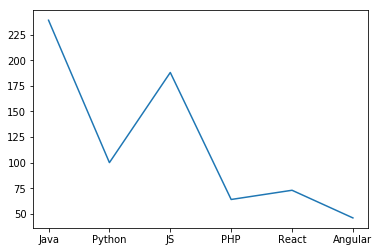

In [13]:
plt.plot(languages, languages_new_york)
plt.show()

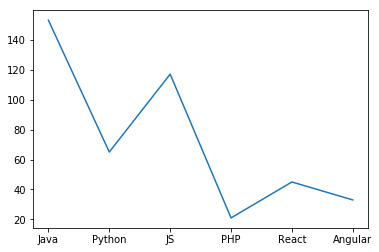

In [14]:
plt.plot(languages, languages_bay_area)
plt.show()

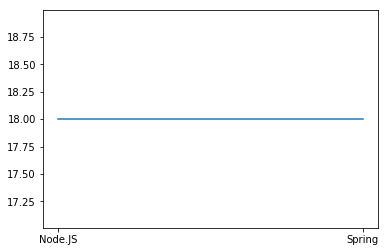

In [18]:
new_york_node_js = np.sum(new_york.iloc[:, 33])
new_york_spring = np.sum(new_york.iloc[:, 42])
plt.plot(['Node.JS', 'Spring'], [new_york_node_js, new_york_spring])

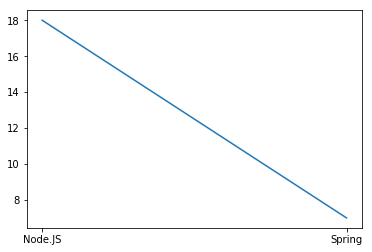

In [19]:
bay_area_node_js = np.sum(bay_area.iloc[:, 33])
bay_area_spring = np.sum(bay_area.iloc[:, 42])
plt.plot(['Node.JS', 'Spring'], [bay_area_node_js, bay_area_spring])